# EOF analysis 

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from xeofs.models import EOF

In [3]:
import xeofs
print(xeofs.__version__)

2.3.2


In [4]:
EOF?

Init signature:
EOF(
    n_modes: int = 2,
    center: bool = True,
    standardize: bool = False,
    use_coslat: bool = False,
    check_nans=True,
    sample_name: str = 'sample',
    feature_name: str = 'feature',
    compute: bool = True,
    verbose: bool = False,
    random_state: Optional[int] = None,
    solver: str = 'auto',
    solver_kwargs: Dict = {},
    **kwargs,
)
Docstring:     
EOF analysis.

Empirical Orthogonal Functions (EOF) analysis, more commonly known
as Principal Component Analysis (PCA).

Parameters
----------
n_modes: int, default=10
    Number of modes to calculate.
center: bool, default=True
    Whether to center the input data.
standardize: bool, default=False
    Whether to standardize the input data.
use_coslat: bool, default=False
    Whether to use cosine of latitude for scaling.
sample_name: str, default="sample"
    Name of the sample dimension.
feature_name: str, default="feature"
    Name of the feature dimension.
compute : bool, default=True
    

In [5]:
model = EOF(n_modes=5)

In [6]:
data_dir = '/work/jet/sea_level_covariability/data/zarr/'
fname = 'AVISO_global_1994to2020_zos_monthly'
ds = xr.open_zarr(f'{data_dir+fname}',use_cftime=True)

In [10]:
model.fit(ds.zos, dim=("yh", "xh"))
expvar = model.explained_variance_ratio()
components = model.components()
scores = model.scores()

In [11]:
from cartopy.crs import EqualEarth, PlateCarree

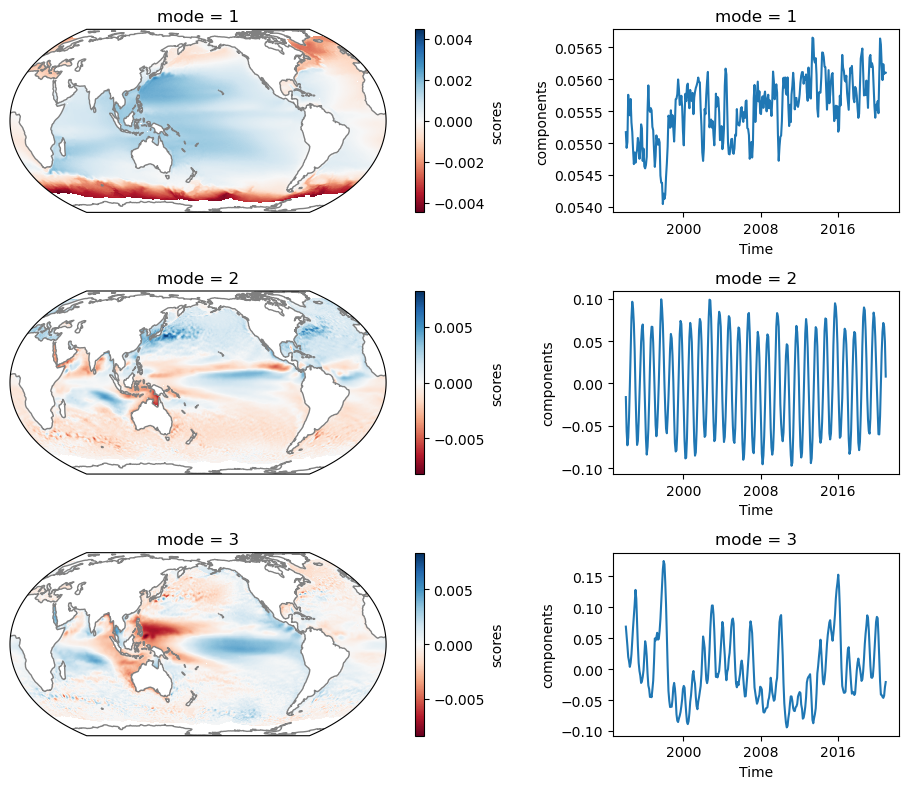

In [12]:
proj = EqualEarth(central_longitude=180)
kwargs = {"cmap": "RdBu", "transform": PlateCarree()}

fig = plt.figure(figsize=(10, 8))
gs = GridSpec(3, 2, width_ratios=[2, 1])
ax0 = [fig.add_subplot(gs[i, 0], projection=proj) for i in range(3)]
ax1 = [fig.add_subplot(gs[i, 1]) for i in range(3)]

for i, (a0, a1) in enumerate(zip(ax0, ax1)):
    scores.sel(mode=i + 1).plot(ax=a0, **kwargs)
    a0.coastlines(color=".5")
    components.sel(mode=i + 1).plot(ax=a1)

    a0.set_xlabel("")

plt.tight_layout()
plt.show()

In [14]:
import momlevel

In [15]:
da = ds.zos-ds.zos.mean('time')
da_anm = da.groupby('time.month') - da.groupby('time.month').mean('time')
da_dtr = momlevel.trend.linear_detrend(da_anm)

/nbhome/jet/miniconda3/envs/test/lib/python3.10/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing with an out-of-order index is generating 27 times more chunks
  return self.array[key]


In [16]:
model = EOF(n_modes=5)
model.fit(da_dtr, dim=("yh", "xh"))
expvar = model.explained_variance_ratio()
components = model.components()
scores = model.scores()

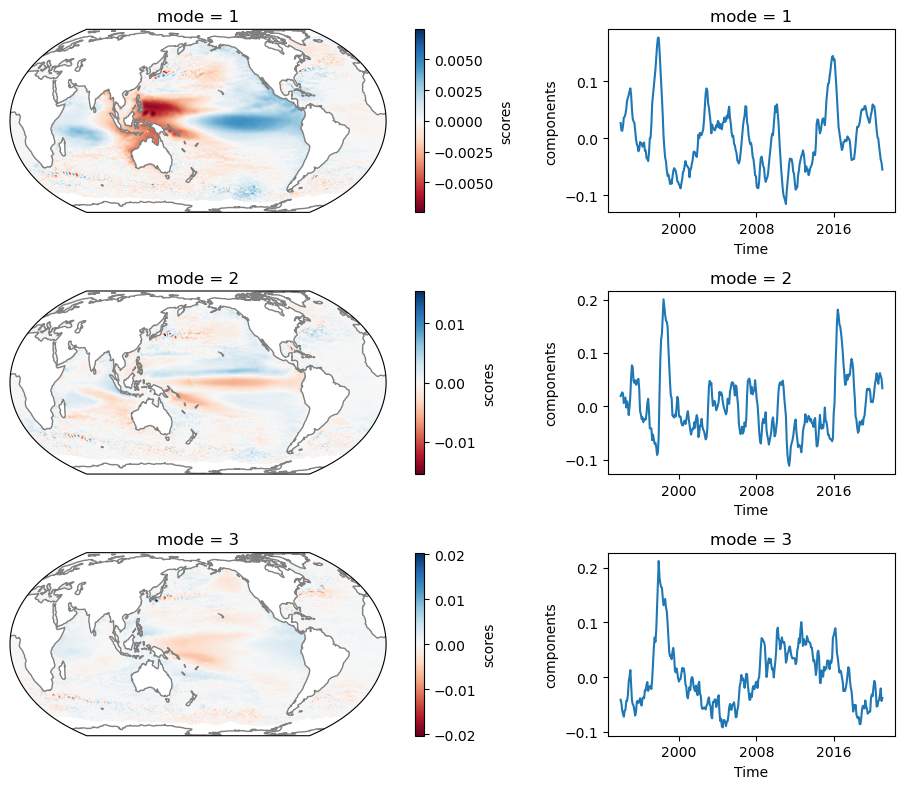

In [17]:
proj = EqualEarth(central_longitude=180)
kwargs = {"cmap": "RdBu", "transform": PlateCarree()}

fig = plt.figure(figsize=(10, 8))
gs = GridSpec(3, 2, width_ratios=[2, 1])
ax0 = [fig.add_subplot(gs[i, 0], projection=proj) for i in range(3)]
ax1 = [fig.add_subplot(gs[i, 1]) for i in range(3)]

for i, (a0, a1) in enumerate(zip(ax0, ax1)):
    scores.sel(mode=i + 1).plot(ax=a0, **kwargs)
    a0.coastlines(color=".5")
    components.sel(mode=i + 1).plot(ax=a1)

    a0.set_xlabel("")

plt.tight_layout()
plt.show()